In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('listings.csv')


### 1)Explore the data


In [4]:
df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20230605012709,2023-06-05,city scrape,Rental unit in New York · ★4.68 · Studio · 1 b...,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.30
1,5121,https://www.airbnb.com/rooms/5121,20230605012709,2023-06-05,previous scrape,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.29
2,14991,https://www.airbnb.com/rooms/14991,20230605012709,2023-06-05,city scrape,Rental unit in New York · ★4.93 · 1 bedroom · ...,Room for rent in my Manhattan apartment. The a...,NaN,https://a0.muscache.com/pictures/56919050/b99e...,59023,...,4.92,4.92,4.85,NaN,f,1,0,1,0,0.14
3,5136,https://www.airbnb.com/rooms/5136,20230605012709,2023-06-05,city scrape,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,NaN,f,1,1,0,0,0.03
4,15341,https://www.airbnb.com/rooms/15341,20230605012709,2023-06-05,city scrape,Condo in New York · ★4.56 · 1 bedroom · 2 beds...,Greetings! <br /><br />Come relax here after y...,This 1-bedroom apartment is conveniently locat...,https://a0.muscache.com/pictures/16faf1ad-cb1f...,60049,...,4.80,4.71,4.34,NaN,f,1,1,0,0,0.30


In [5]:
df.shape


(43566, 75)

In [6]:
df.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
important_columns = [
    'host_name',
    'room_type',
    'bathrooms', 'bedrooms', 'beds',
    'has_availability', 'availability_365',
    'review_scores_rating',
    'price'
]


In [8]:
df2 = df[important_columns]


In [9]:
df2.head()


,host_name,room_type,bathrooms,bedrooms,beds,has_availability,availability_365,review_scores_rating,price
0,Jennifer,Entire home/apt,NaN,NaN,1.0,t,325,4.68,$240.00
1,Garon,Private room,NaN,NaN,1.0,t,0,4.52,$60.00
2,Bianca,Private room,NaN,NaN,1.0,t,268,4.93,$120.00
3,Rebecca,Entire home/apt,NaN,2.0,2.0,t,275,5.00,$276.00
4,Ted,Entire home/apt,NaN,1.0,2.0,t,160,4.56,$315.00


In [10]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43566 entries, 0 to 43565
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_name             43561 non-null  object 
 1   room_type             43566 non-null  object 
 2   bathrooms             0 non-null      float64
 3   bedrooms              25073 non-null  float64
 4   beds                  42765 non-null  float64
 5   has_availability      43566 non-null  object 
 6   availability_365      43566 non-null  int64  
 7   review_scores_rating  33070 non-null  float64
 8   price                 43566 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 3.0+ MB


In [11]:
df2.drop('bathrooms', axis=1, inplace=True)


C:\Users\xobed\AppData\Local\Temp\ipykernel_8240\1913231657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('bathrooms', axis=1, inplace=True)


In [12]:
df2.describe()


,bedrooms,beds,availability_365,review_scores_rating
count,25073.000000,42765.000000,43566.000000,33070.000000
mean,1.592909,1.659067,136.998256,4.637119
std,0.922746,1.173349,137.346191,0.709516
min,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,4.600000
50%,1.000000,1.000000,89.000000,4.830000
75%,2.000000,2.000000,278.000000,5.000000
max,26.000000,42.000000,365.000000,5.000000


### 2-Preprocessing


In [13]:
df2['price'] = df2['price'].str.replace('$', '')


C:\Users\xobed\AppData\Local\Temp\ipykernel_8240\2614231370.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['price'] = df2['price'].str.replace('$', '')
C:\Users\xobed\AppData\Local\Temp\ipykernel_8240\2614231370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'] = df2['price'].str.replace('$', '')


In [14]:
df2['price'] = df2['price'].str.replace(',', '')


C:\Users\xobed\AppData\Local\Temp\ipykernel_8240\2203622580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'] = df2['price'].str.replace(',', '')


In [15]:
df2['price'] = df2['price'].astype(float)


C:\Users\xobed\AppData\Local\Temp\ipykernel_8240\566884258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'] = df2['price'].astype(float)


In [16]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43566 entries, 0 to 43565
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_name             43561 non-null  object 
 1   room_type             43566 non-null  object 
 2   bedrooms              25073 non-null  float64
 3   beds                  42765 non-null  float64
 4   has_availability      43566 non-null  object 
 5   availability_365      43566 non-null  int64  
 6   review_scores_rating  33070 non-null  float64
 7   price                 43566 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.7+ MB


In [17]:
df2.describe()


,bedrooms,beds,availability_365,review_scores_rating,price
count,25073.000000,42765.000000,43566.000000,33070.000000,43566.000000
mean,1.592909,1.659067,136.998256,4.637119,225.216109
std,0.922746,1.173349,137.346191,0.709516,818.738268
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,4.600000,80.000000
50%,1.000000,1.000000,89.000000,4.830000,136.000000
75%,2.000000,2.000000,278.000000,5.000000,228.000000
max,26.000000,42.000000,365.000000,5.000000,90120.000000


## handle missing values


In [18]:
df2.isna().sum() / len(df2) * 100


host_name                0.011477
room_type                0.000000
bedrooms                42.448239
beds                     1.838590
has_availability         0.000000
availability_365         0.000000
review_scores_rating    24.092182
price                    0.000000
dtype: float64

In [19]:
df2.dropna(subset=['beds', 'host_name'], axis=0, inplace=True)


C:\Users\xobed\AppData\Local\Temp\ipykernel_8240\1461176839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['beds', 'host_name'], axis=0, inplace=True)


In [20]:
df2.isna().sum() / len(df2) * 100


host_name                0.000000
room_type                0.000000
bedrooms                42.027596
beds                     0.000000
has_availability         0.000000
availability_365         0.000000
review_scores_rating    23.917212
price                    0.000000
dtype: float64

In [21]:
df2[df2['review_scores_rating'].isna()]


,host_name,room_type,bedrooms,beds,has_availability,availability_365,review_scores_rating,price
34,Carol Gloria,Private room,NaN,2.0,t,0,NaN,89.0
39,Jade,Entire home/apt,1.0,2.0,t,249,NaN,215.0
45,David,Entire home/apt,1.0,1.0,f,0,NaN,200.0
47,Harriet,Private room,1.0,2.0,f,0,NaN,150.0
133,Wendy,Entire home/apt,1.0,1.0,t,0,NaN,150.0
...,...,...,...,...,...,...,...,...
43561,CrossOver,Entire home/apt,4.0,4.0,t,364,NaN,350.0
43562,RoomPicks By Antony,Private room,1.0,1.0,t,250,NaN,662.0
43563,CrossOver,Entire home/apt,4.0,4.0,t,364,NaN,387.0
43564,Isabella,Private room,1.0,1.0,f,8,NaN,51.0


In [22]:
df2['review_scores_rating'].fillna(0, inplace=True)


C:\Users\xobed\AppData\Local\Temp\ipykernel_8240\1859811655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['review_scores_rating'].fillna(0, inplace=True)


In [23]:
df2.isna().sum() / len(df2) * 100


host_name                0.000000
room_type                0.000000
bedrooms                42.027596
beds                     0.000000
has_availability         0.000000
availability_365         0.000000
review_scores_rating     0.000000
price                    0.000000
dtype: float64

In [24]:
df2[df2['bedrooms'].isna()]


,host_name,room_type,bedrooms,beds,has_availability,availability_365,review_scores_rating,price
0,Jennifer,Entire home/apt,NaN,1.0,t,325,4.68,240.0
1,Garon,Private room,NaN,1.0,t,0,4.52,60.0
2,Bianca,Private room,NaN,1.0,t,268,4.93,120.0
8,Shunichi,Private room,NaN,1.0,t,10,4.26,68.0
9,Cristina,Private room,NaN,1.0,t,225,4.86,91.0
...,...,...,...,...,...,...,...,...
43523,Kay,Private room,NaN,1.0,t,340,0.00,100.0
43532,Jacquelyn,Entire home/apt,NaN,1.0,f,37,0.00,109.0
43537,Julia,Entire home/apt,NaN,1.0,t,13,0.00,158.0
43543,Alex,Entire home/apt,NaN,1.0,t,180,0.00,350.0


In [25]:
df2['bedrooms'].value_counts(dropna=False)


NaN     17971
1.0     14940
2.0      6358
3.0      2529
4.0       694
5.0       167
6.0        63
7.0        17
9.0         9
8.0         6
14.0        1
21.0        1
10.0        1
26.0        1
11.0        1
15.0        1
Name: bedrooms, dtype: int64

In [26]:
df2['bedrooms'].fillna(0, inplace=True)


C:\Users\xobed\AppData\Local\Temp\ipykernel_8240\1331191467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bedrooms'].fillna(0, inplace=True)


In [27]:
df2.isna().sum() / len(df2) * 100


host_name               0.0
room_type               0.0
bedrooms                0.0
beds                    0.0
has_availability        0.0
availability_365        0.0
review_scores_rating    0.0
price                   0.0
dtype: float64

In [30]:
df2[df2.duplicated()]


,host_name,room_type,bedrooms,beds,has_availability,availability_365,review_scores_rating,price
406,The Box House Hotel,Entire home/apt,1.0,2.0,t,124,4.81,365.0
427,The Box House Hotel,Entire home/apt,1.0,2.0,t,124,4.83,365.0
429,The Box House Hotel,Entire home/apt,1.0,2.0,t,124,4.81,365.0
433,The Box House Hotel,Entire home/apt,1.0,2.0,t,124,4.81,365.0
438,The Box House Hotel,Entire home/apt,1.0,2.0,t,124,4.90,365.0
...,...,...,...,...,...,...,...,...
43527,Kristina,Private room,1.0,1.0,t,364,0.00,46.0
43529,Kristina,Private room,1.0,1.0,t,364,0.00,46.0
43534,Kristina,Private room,1.0,1.0,t,364,0.00,46.0
43559,CrossOver,Entire home/apt,4.0,4.0,t,364,0.00,435.0


# I didn't remove duplicate rows because they may indicate how many times booking


In [31]:
df2['host_name'].value_counts()


Blueground     569
RoomPicks      506
Eugene         491
June           421
Michael        348
              ... 
Kreshnik         1
Lotte Elisa      1
Oof              1
Hamad            1
Moayed           1
Name: host_name, Length: 9675, dtype: int64

# 3-Identifying Trends and Patterns:


In [32]:
df2.head()


,host_name,room_type,bedrooms,beds,has_availability,availability_365,review_scores_rating,price
0,Jennifer,Entire home/apt,0.0,1.0,t,325,4.68,240.0
1,Garon,Private room,0.0,1.0,t,0,4.52,60.0
2,Bianca,Private room,0.0,1.0,t,268,4.93,120.0
3,Rebecca,Entire home/apt,2.0,2.0,t,275,5.00,276.0
4,Ted,Entire home/apt,1.0,2.0,t,160,4.56,315.0


In [33]:
df2.describe()


,bedrooms,beds,availability_365,review_scores_rating,price
count,42760.000000,42760.000000,42760.000000,42760.000000,42760.000000
mean,0.925561,1.659121,137.280566,3.529638,225.801146
std,1.056797,1.173399,137.250987,2.072405,824.185898
min,0.000000,1.000000,0.000000,0.000000,10.000000
25%,0.000000,1.000000,0.000000,1.000000,80.000000
50%,1.000000,1.000000,89.000000,4.710000,138.000000
75%,1.000000,2.000000,278.000000,4.950000,229.000000
max,26.000000,42.000000,365.000000,5.000000,90120.000000


In [34]:
df2['host_name'].value_counts()


Blueground     569
RoomPicks      506
Eugene         491
June           421
Michael        348
              ... 
Kreshnik         1
Lotte Elisa      1
Oof              1
Hamad            1
Moayed           1
Name: host_name, Length: 9675, dtype: int64

In [37]:
# sns.countplot(data = df2 , x='host_name')


In [36]:
df2['room_type'].value_counts()


Entire home/apt    24326
Private room       17742
Shared room          557
Hotel room           135
Name: room_type, dtype: int64

<Axes: xlabel='room_type', ylabel='count'>

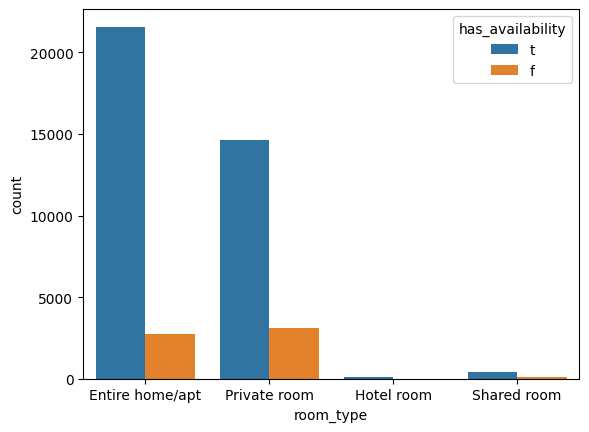

In [44]:
sns.countplot(data=df2, x='room_type', hue='has_availability')


In [41]:
df2['bedrooms'].value_counts()


0.0     17971
1.0     14940
2.0      6358
3.0      2529
4.0       694
5.0       167
6.0        63
7.0        17
9.0         9
8.0         6
14.0        1
21.0        1
10.0        1
26.0        1
11.0        1
15.0        1
Name: bedrooms, dtype: int64

In [43]:
df2['has_availability'].value_counts()


t    36758
f     6002
Name: has_availability, dtype: int64

<Axes: xlabel='price'>

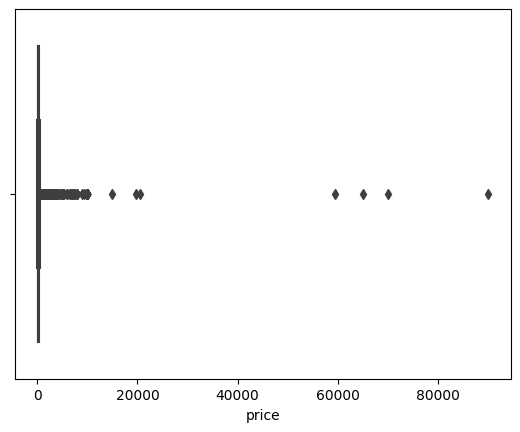

In [46]:
sns.boxplot(data=df2, x='price')


In [52]:
df2[df2['price'] > 40000].index


Int64Index([2571, 9201, 22276, 31931], dtype='int64')

In [54]:
df2.drop([2571, 9201, 22276, 31931], axis=0, inplace=True)


C:\Users\xobed\AppData\Local\Temp\ipykernel_8240\194131032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop([2571, 9201, 22276, 31931] , axis=0 , inplace=True)


<Axes: xlabel='price'>

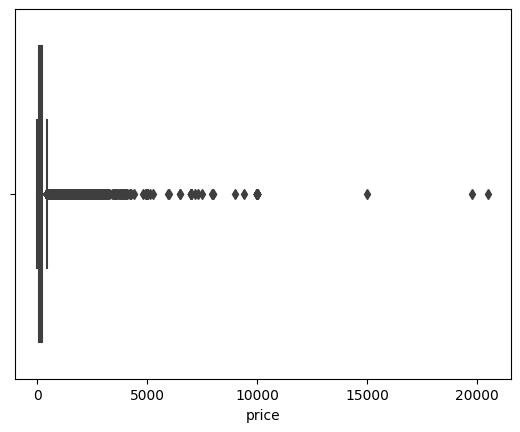

In [55]:
sns.boxplot(data=df2, x='price')


In [57]:
df2[df2['price'] > 10000].index


Int64Index([9614, 29977, 31811], dtype='int64')

In [58]:
df2.drop([9614, 29977, 31811], axis=0, inplace=True)


C:\Users\xobed\AppData\Local\Temp\ipykernel_8240\3167038920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop([9614, 29977, 31811] , axis=0 , inplace=True)


<Axes: xlabel='price'>

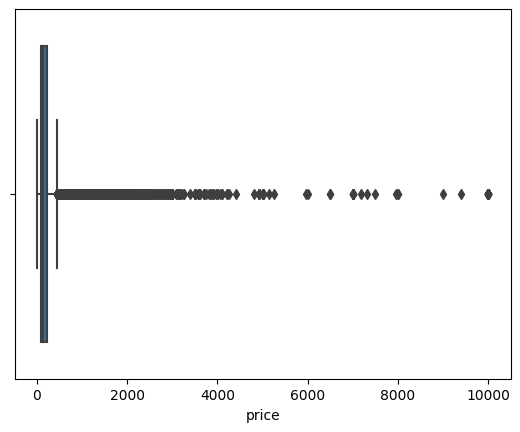

In [59]:
sns.boxplot(data=df2, x='price')


<Axes: xlabel='price', ylabel='Count'>

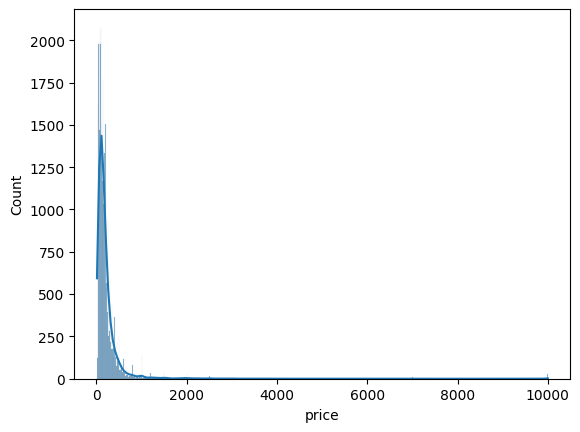

In [61]:
sns.histplot(data=df2, x='price', kde=True)


In [63]:
df2['price'].mean()


217.8861366453816

In [78]:
# Right Skew data (less influenced by extreme values than the mean.)
df2['price'].median()


138.0

In [64]:
df2['price'].std()


414.86955492954405

In [67]:
df2


,host_name,room_type,bedrooms,beds,has_availability,availability_365,review_scores_rating,price
0,Jennifer,Entire home/apt,0.0,1.0,t,325,4.68,240.0
1,Garon,Private room,0.0,1.0,t,0,4.52,60.0
2,Bianca,Private room,0.0,1.0,t,268,4.93,120.0
3,Rebecca,Entire home/apt,2.0,2.0,t,275,5.00,276.0
4,Ted,Entire home/apt,1.0,2.0,t,160,4.56,315.0
...,...,...,...,...,...,...,...,...
43561,CrossOver,Entire home/apt,4.0,4.0,t,364,0.00,350.0
43562,RoomPicks By Antony,Private room,1.0,1.0,t,250,0.00,662.0
43563,CrossOver,Entire home/apt,4.0,4.0,t,364,0.00,387.0
43564,Isabella,Private room,1.0,1.0,f,8,0.00,51.0


<Axes: xlabel='room_type', ylabel='price'>

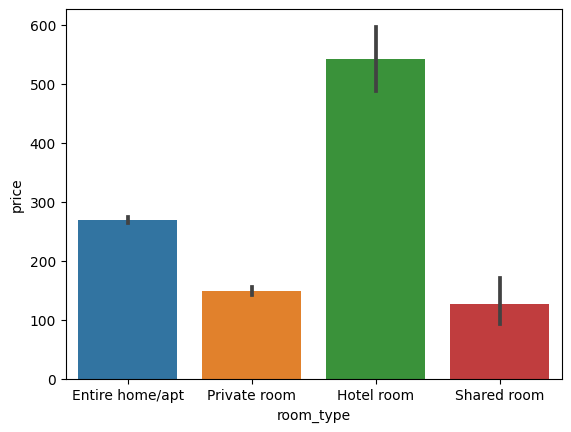

In [72]:
sns.barplot(data=df2, y='price', x='room_type')


<Axes: xlabel='room_type', ylabel='price'>

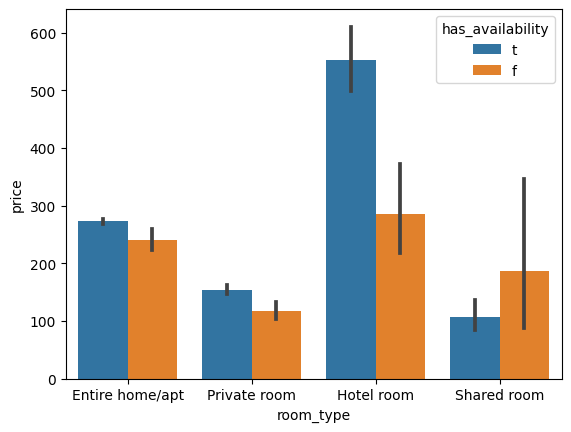

In [73]:
sns.barplot(data=df2, y='price', x='room_type', hue='has_availability')


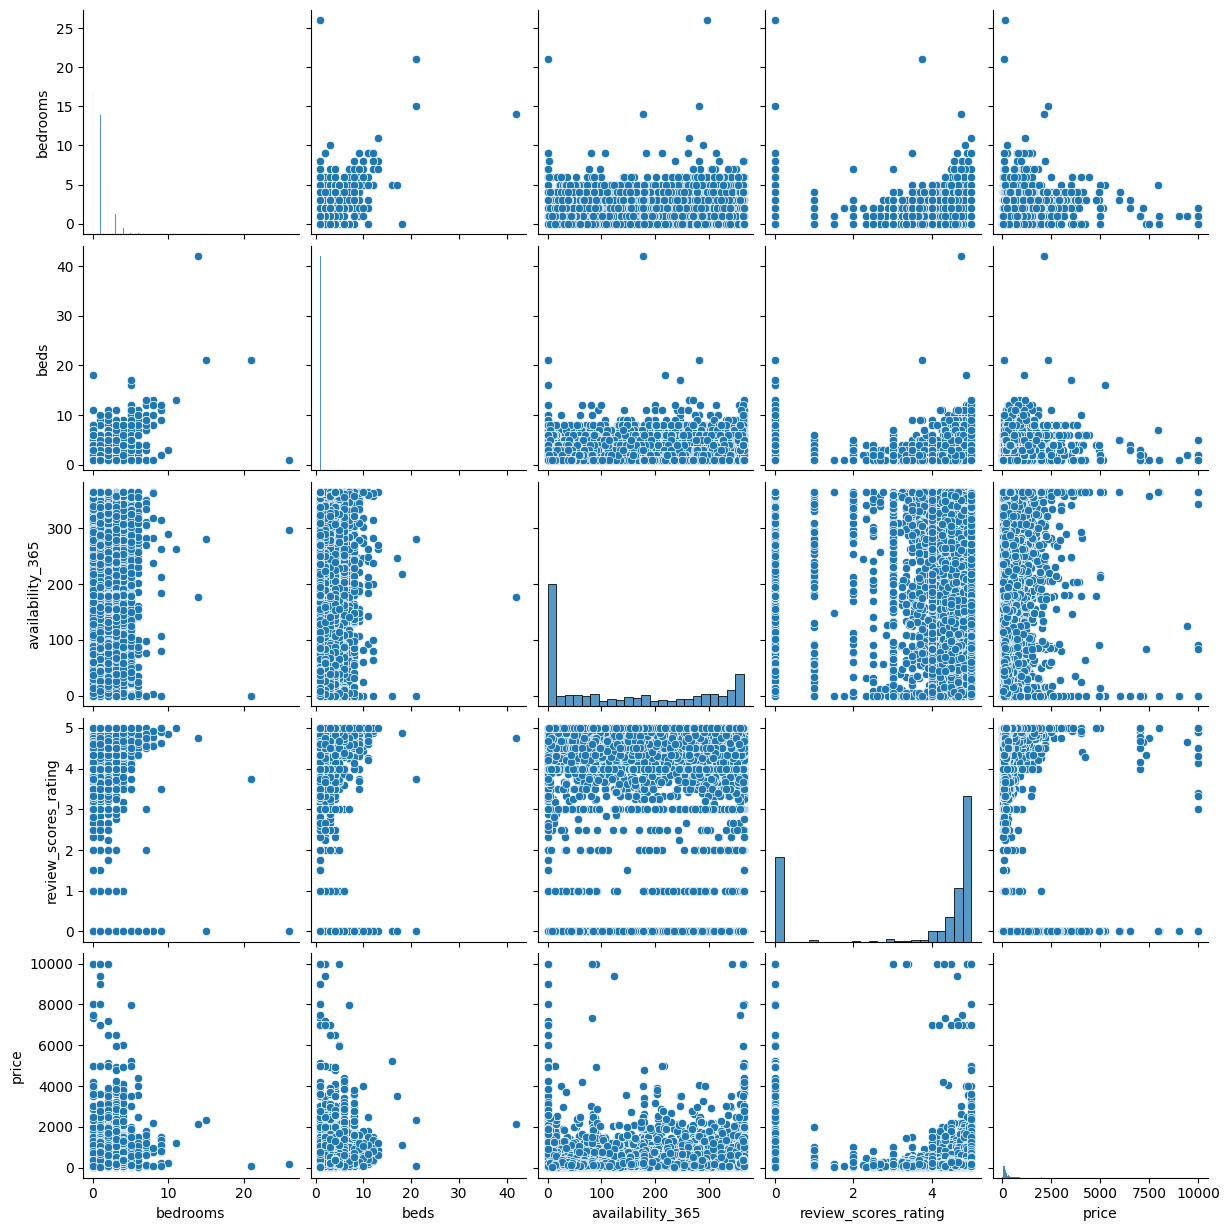

In [74]:
sns.pairplot(data=df2)


In [76]:
df2.corr()['price']


C:\Users\xobed\AppData\Local\Temp\ipykernel_8240\2407139807.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()['price']


bedrooms                0.275764
beds                    0.274340
availability_365        0.089042
review_scores_rating   -0.110308
price                   1.000000
Name: price, dtype: float64

1. **Bedrooms and Beds:** Both the "bedrooms" and "beds" variables have positive correlations with the "price" variable (0.275764 and 0.274340, respectively). This suggests that listings with more bedrooms and beds tend to have higher prices.

2. **Availability:** The "availability_365" variable has a positive correlation with "price" (0.089042). This suggests that listings with higher availability throughout the year tend to have slightly higher prices. However, the correlation is not very strong.

3. **Review Scores Rating:** The "review_scores_rating" variable has a negative correlation with "price" (-0.110308). This implies that, on average, listings with higher review scores tend to have slightly lower prices. This relationship might be due to hosts offering more competitive prices to attract guests when their properties have higher ratings.


In [77]:
df2.describe()


,bedrooms,beds,availability_365,review_scores_rating,price
count,42753.000000,42753.000000,42753.000000,42753.000000,42753.000000
mean,0.925549,1.658784,137.269525,3.529784,217.886137
std,1.056639,1.172188,137.246055,2.072334,414.869555
min,0.000000,1.000000,0.000000,0.000000,10.000000
25%,0.000000,1.000000,0.000000,1.000000,80.000000
50%,1.000000,1.000000,89.000000,4.710000,138.000000
75%,1.000000,2.000000,278.000000,4.950000,229.000000
max,26.000000,42.000000,365.000000,5.000000,10000.000000


<Axes: xlabel='availability_365', ylabel='review_scores_rating'>

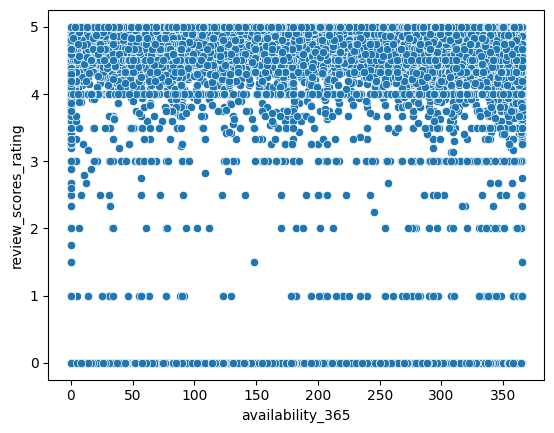

In [81]:
sns.scatterplot(data=df2, x='availability_365', y='review_scores_rating')


C:\Users\xobed\AppData\Local\Temp\ipykernel_8240\3706245263.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df2.corr()  , annot= True)


<Axes: >

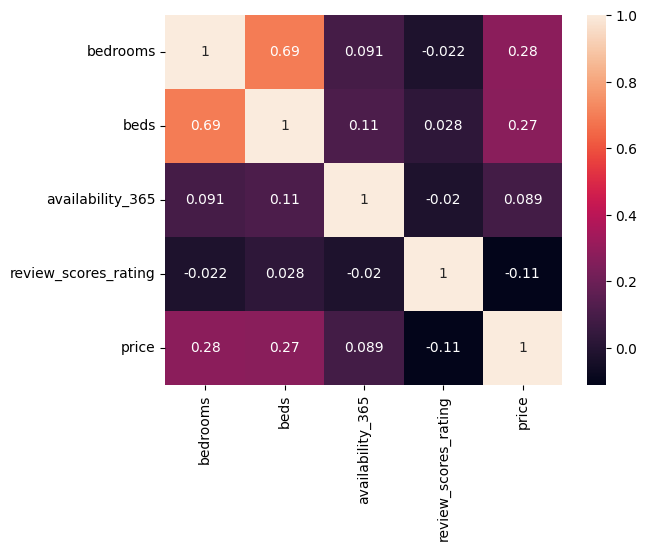

In [85]:
sns.heatmap(data=df2.corr(), annot=True)


# Final view :

1. **Bedrooms and Beds:**

   - The correlation coefficient between "bedrooms" and "beds" is 0.694876, indicating a strong positive correlation. This suggests that listings with more bedrooms tend to have more beds, which is expected.

2. **Bedrooms and Availability:**

   - The correlation coefficient between "bedrooms" and "availability_365" is 0.091481, which suggests a very weak positive correlation. There's a slight tendency for listings with more bedrooms to have slightly higher availability throughout the year, but the correlation is not significant.

3. **Bedrooms and Review Scores Rating:**

   - The correlation coefficient between "bedrooms" and "review_scores_rating" is -0.021898, indicating a very weak negative correlation. There's no significant relationship between the number of bedrooms and review scores.

4. **Bedrooms and Price:**

   - The correlation coefficient between "bedrooms" and "price" is 0.275764, showing a positive correlation. Listings with more bedrooms tend to have higher prices.

5. **Beds and Availability:**

   - The correlation coefficient between "beds" and "availability_365" is 0.111253, indicating a weak positive correlation. Listings with more beds have slightly higher availability, but the correlation is not strong.

6. **Beds and Review Scores Rating:**

   - The correlation coefficient between "beds" and "review_scores_rating" is 0.027615, suggesting a very weak positive correlation. There's no significant relationship between the number of beds and review scores.

7. **Beds and Price:**

   - The correlation coefficient between "beds" and "price" is 0.274340, indicating a positive correlation. Listings with more beds tend to have higher prices.

8. **Availability and Review Scores Rating:**

   - The correlation coefficient between "availability_365" and "review_scores_rating" is -0.019878, indicating a very weak negative correlation. There's no significant relationship between availability and review scores.

9. **Availability and Price:**

   - The correlation coefficient between "availability_365" and "price" is 0.089042, suggesting a weak positive correlation. Listings with higher availability throughout the year tend to have slightly higher prices.

10. **Review Scores Rating and Price:**
    - The correlation coefficient between "review_scores_rating" and "price" is -0.110308, indicating a negative correlation. Listings with higher review scores tend to have slightly lower prices.
